In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

In [2]:
# 한글 폰트 설정
plt.rc("font", family='Malgun Gothic')

# - 깨짐 설정
plt.rcParams['axes.unicode_minus'] = False

## 정규분포(Normal Distribution)

In [3]:
# 표준화는 데이터를 정규분포로 맞춰주는것은 아니다(정규분포와 비교를 위해 데이터를 표준정규분포와 같은 척도로 맞춰줌)

In [4]:
# 표준 정규분포 데이터
norm_sample = stats.norm.rvs(size=100)

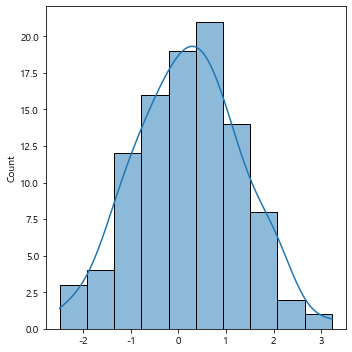

In [5]:
# 히스토그램
fig, ax = plt.subplots(figsize=(5, 5))
ax = sns.histplot(data=norm_sample, kde=True)

fig.tight_layout()
plt.show()

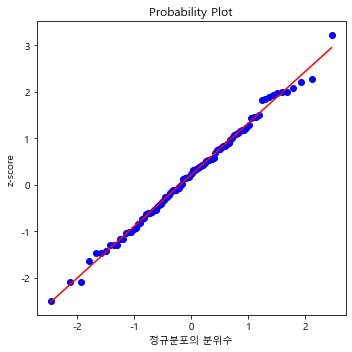

In [6]:
## QQ plot: 표본이 특정 분포에 얼마나 가까운지를 시각적으로 판별하는데 사용
fig, ax = plt.subplots(figsize=(5, 5))
stats.probplot(norm_sample, plot=ax)
ax.set_xlabel('정규분포의 분위수')
ax.set_ylabel('z-score')

fig.tight_layout()
plt.show()

## 긴 꼬리 분포(Long-Tailed Distributions)

In [7]:
# 긴 꼬리 분포 데이터(넷플릭스의 일일 주식 수익률)
nflx = pd.read_csv('../../data/sp500_data.csv')['NFLX']

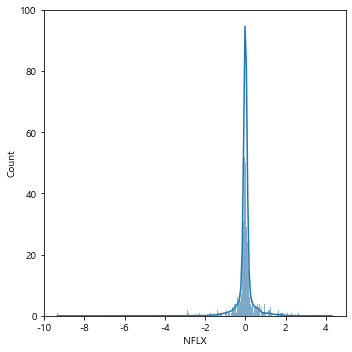

In [8]:
# 히스토그램
fig, ax = plt.subplots(figsize=(5, 5))
ax = sns.histplot(data=nflx, kde=True)
ax.set_ylim([0, 100])

fig.tight_layout()
plt.show()

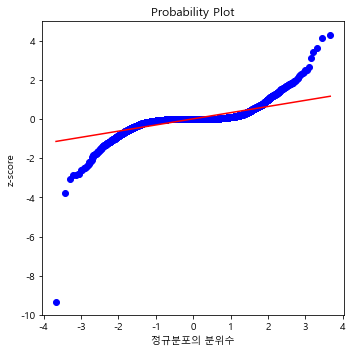

In [9]:
# QQ plot
fig, ax = plt.subplots(figsize=(5, 5))
stats.probplot(nflx, plot=ax)
ax.set_xlabel('정규분포의 분위수')
ax.set_ylabel('z-score')

fig.tight_layout()
plt.show()

## 이항분포(Binomial Distribution)

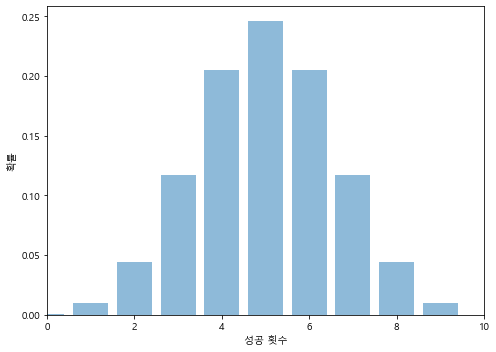

In [33]:
# n=10(시행횟수), p=0.5(성공확률)인 이항분포
bprob = []
for x in range(10):
    bprob.append(stats.binom.pmf(x, n=10, p=0.5))

fig, ax = plt.subplots(figsize=(7, 5))
ax.bar(range(len(bprob)), bprob, alpha=0.5)
ax.set_xlim([0, 10])
ax.set_ylabel('확률')
ax.set_xlabel('성공 횟수')

fig.tight_layout()
plt.show()

In [31]:
# n=5, p=0.1, x<=2일 확률
stats.binom.cdf(2, n=5, p=.1)

0.99144

## 푸아송 분포(Poisson Distributions)
- 표집된 단위 시간 혹은 단위 공간에서 발생한 사건의 도수분포

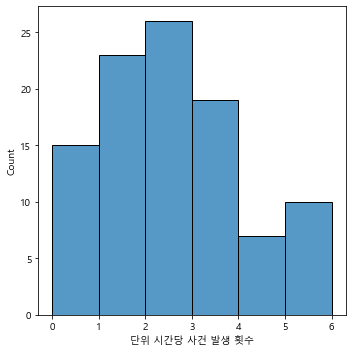

In [56]:
sample = stats.poisson.rvs(2, size=100) # ex)1분당 평균 2회의 전화량.
fig ,ax = plt.subplots(figsize=(5, 5))
ax = sns.histplot(data=sample, bins=6)
ax.set_xlabel('단위 시간당 사건 발생 횟수')

fig.tight_layout()
plt.show()

## 지수분포(Exponential Distribution)
- 한 사건에서 그다음 사건까지의 시간이나 거리에 대한 도수분포

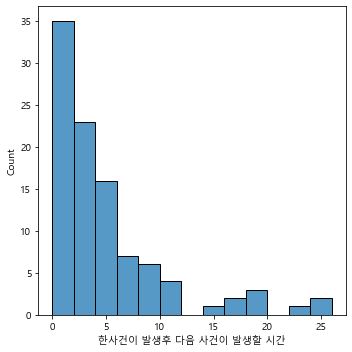

In [59]:
sample = stats.expon.rvs(scale=5, size=100) # 한사건 발생후 그다음 사건 발생까지의 평균적인 시간은 5분
fig ,ax = plt.subplots(figsize=(5, 5))
ax = sns.histplot(data=sample)
ax.set_xlabel('한 사건이 발생후 다음 사건이 발생할 시간')

fig.tight_layout()
plt.show()

## 베이불 분포(Weibull Distribution)
- 사건 발생률이 시간에 따라 변화하는 지수분포의 일반화된 버전, ex) 증가하는 고장률

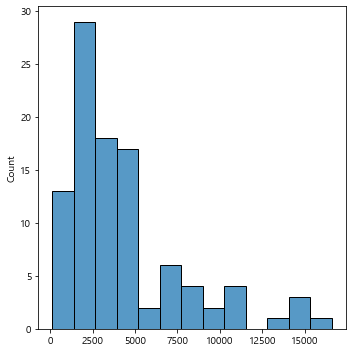

In [60]:
sample = stats.weibull_min.rvs(1.5, # B>1: 발생률은 시간이 지남에 따라 증가, B<1: 감소
                               scale=5000, # 특성 수명
                               size=100
                              )
fig ,ax = plt.subplots(figsize=(5, 5))
ax = sns.histplot(data=sample)

fig.tight_layout()
plt.show()